# Applied Statistics Tasks

### Edward Cronin ATU Student G00425645

____

## Task 1

<img src="Ronald.A.Fisher.png" alt="Ronald A. Fisher" style="float: right; height: 240px;">
 Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

 Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

 Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

 Would you accept two errors? Explain.

 *The Design of Experiments By Ronald A. Fisher*

 ____

__This task aims to calculate the probability that an individual can select the correct six cups.  The approach taken will be similar to that taken by Ronald A. Fisher in the Design of Experiments.  There are three parts to completing this task.  Part A will calculate the number of ways of selecting six cups from twelve.  Part B will examine overlaps between one of the variables in the experiment (eg. cups with tea in first), and the overall number of combinations.  We will then count the number of times each overlap occurs.  Part C will examine accepting errors in selcting the correct six cups.__

## Part A: Calculate the number of ways of selecting six from twelve

To complete this task, relevant libraries must first be imported.  Permutations and combinations will be outlined to help explain the ordering and selection of variables. Next, the total number of cups must be defined along with each variable.  One variable is cups with tea first, the other variable is cups with milk first.   Using python, we will then calculate the number of ways of selecting six cups from twelve.

In [1]:
## Importing Relevant Libaries for completion of Task One

# Mathematical functions from the standard library.  This tool provides mathematical functions. 
# Great for basic calculations like square roots, trigonometry, logarithms, etc.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations. Offers tools for creating iterators for efficient looping. 
# Useful for permutations and combinations, creating complex iterators, and more
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.  This tool generates pseudo-random numbers for various distributions. 
# Handy for simulations, random sampling, etc.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.  This tool is essential for numerical computing. 
# It supports arrays, matrices, and functions for high-level mathematical operations
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np 

# Plotting.  This is a 2D plotting library that is a great tool for plotting graohs and visualisation of data.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

### Permutations and Combinations ###

__Permutations__

A permutation is an ordering of its elements.  Each unique sequence is a permutation. 

For instance the set {a, b, c,} has permutations abc, acb, bac, bca, cab, and cba.

__Combinations__

A combination is a selection of k elements from a set of size n.

In combinations, order does not matter and the same element cannot be selected twice.

The combinations of size 2 from the set {a, b, c} are {a, b}, {a, c}, and {b, c}.

### Cups of Tea ###

Next we define the relevant variables in the experiment

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

### Adaption of Fisher's Table

https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

This section adapts Fishers table which outlines four possible categories results would fit into.  It formed the basis of the original test and is a model to base this test on, where we are requiring an individual to correctly identify six cups out of 12.

In [23]:
import numpy as np
# A numpy random number generator
rng = np.random.default_rng()

import pandas as pd
# Safe setting for Pandas.  Needs Pandas version >= 1.5.
pd.set_option('mode.copy_on_write', True)

# Load the library for plotting, name it 'plt'
import matplotlib.pyplot as plt
# Make plots look a little more fancy
plt.style.use('fivethirtyeight')

We’ll build a data table for the 12 cups similar to the one that Fisher would have been looking at when he did his analysis.

In [24]:
# Make an empty DataFrame to store the twelve cups.
tea_df = pd.DataFrame()
# insert a column that records whether the milk is poured before the tea, into that cup:
tea_df['milk_first'] = np.repeat(['yes', 'no'], [6, 6])
# Add a column recording the guesses for the cups where milk was poured first:
tea_df['says_milk_first'] = np.repeat(['yes', 'no'], [6, 6])
# Take a sample (without replacement) of 12 rows.
# This has the effect of putting rows in random order.
tea_df = tea_df.sample(12, replace=False)
# Reset the row labels to throw away the labels showing the original order.
tea_df = tea_df.reset_index(drop=True)

In [26]:
# Show our reconstruction of Fisher's table based on 12 random guesses.
tea_df

,milk_first,says_milk_first
0,yes,yes
1,no,no
2,no,no
3,no,no
4,yes,yes
5,yes,yes
6,no,no
7,yes,yes
8,no,no
9,yes,yes


It is often useful to cross-tabulate the rows of the data frame by giving counts in each category. pd.crosstab does this job, given the two columns of data.

In [28]:
milk_first = tea_df['milk_first']
says_milk_first = tea_df['says_milk_first']
counts_tab = pd.crosstab(milk_first, says_milk_first)
counts_tab

says_milk_first,no,yes
milk_first,,
no,6,0
yes,0,6


The cross-tabulation counts the number of rows (observations) in each of the four possible categories:

Actually milk-first, Person says milk-first (‘yes’, ‘yes’ rows).

Actually milk-second, Person says milk-first (‘no’, ‘yes’ rows).

Actually milk-first, Person says milk-second (‘yes’, ‘no’ rows).

Actually milk-second, Person says milk-second (‘no’, ‘no’, rows).

We will concentrate on the ‘yes’, ‘yes’ combination. If the person correctly identifies all six of the milk-first cups, that means they got every cup correct — because they must identify six as milk-first, and six as tea-first.

In other words, if they got all milk-first cups right (‘yes’, ‘yes’), then they necessarily got all six tea-first cups right (‘no’, ‘no’).

In [29]:
milk_first_correct = counts_tab.loc['yes', 'yes']
milk_first_correct

6

In the test by Ronald A. Fisher, Muriel guessed correctly for each of the eight cups, and so correctly identified all four milk-first cups.  Individuals would need to correctly identify all six cups in this experiment.  So, how many ways are there to select six cups from twelve, the next section explores this aspect.

### math.comb(n, k) ###

https://docs.python.org/3/library/math.html#math.comb

https://www.w3schools.com/python/ref_math_comb.asp 

The math.comb() method returns the number of ways picking k unordered outcomes from n possibilities, without repetition, also known as combinations

In [3]:
# Number of ways of selecting six cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

__As calculated above, the total number of ways of selecting six cups from twelve is 924__


__Calculating Number of Combinations__ 

This code will also calculate the number of combinations of selecting six cups from twelve.  The output will be the same as the math.comb calculation above.

If we label the twelve cups of tea as follows 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, and 12.

Then we select six cups to have milk in first.

For example, we might select 2, 4, 5, 8, 10, and 12 .

Visualize having six placeholders where we place six of the cup labels.

How many ways are there to select six cups from twelve?

Cups: 1 2 3 4 5 6 7 8 9 10 11 12

Placeholders: _ _ _ _ _ _

In [4]:
# Total number of ways of selecting six cups from twelve, keeping them in order.  
# This is the number of ways of selecting the first cup, then the second, then the third, etc.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

Note we don't care about order: if cups 1, 2, 4, 5, 8, and 12 are selected in order it is the same result as if 2, 12, 8, 1, 4, and 5 were selected, or any other permutation.

4 8 6 5 11 2

2 8 6 11 4 5


In [5]:
# No of ways of shuffling six cups.
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles

720

In [6]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

### Binomial Coefficient ###

https://www.w3schools.com/python/numpy/numpy_random_binomial.asp

Binomial Distribution is a Discrete Distribution .  It describes the outcome of binary scenarios, e.g. toss of a coin, it will either be head or tails.   It is used in probability and statistics, most often in the binomial distribution, which is used to model the number of positive outcomes obtained by repeating times an experiment that can have only two outcomes (success and failure)

In mathematics, the math.comb() function is called the choose function.

It is written and calculated as

![Binomial Coefficient](binomial_coefficient.png)



### Number of cups of tea in total.

n = 12

### Number of cups of tea with milk in first.
k = 6

### Math.factorial ###

https://docs.python.org/3.12/library/math.html#math.factorial

Mathematically denoted as n!.

Multiply all positive integers from n down to 1.

n! = n x (n - 1) x (n - 2) x ... x 1

e.g. 6! = 6 x 5 x 4 x 3 x 2 x 1 = 720

In [7]:
# Number of cups of tea in total.
n = 12

# Twelve factorial.
math.factorial(n)

479001600

In [8]:
# Number of cups of tea with milk in first.
k = 6

# Six factorial.
math.factorial(k)

720

In [9]:
# Six factorial.
math.factorial(n - k)

720

In [10]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

n! = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1

k! = 6 x 5 x 4 x 3 x 2 x 1

(n - k)! = 6 x 5 x 4 x 3 x 2 x 1

n!/(n - k)! = (12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (6 x 5 x 4 x 3 x 2 x 1) = 12 x 11 x 10 x 9 x 8 x 7

The total combinations is calculated as 924.  This is the number of ways of selecting six cups from twelve, keeping them in order.

____

## Part B: Calculate Overlaps

This part will first list out the labels in the experiment, it will then show the different ways of selecting no_cups_milk_first out of no_cups cups of tea. Next, we will select six cups at random to put milk in first.  The number of combinations (previously calculated in Part A) is documented.  We will show the overlaps and count the number of times each overlap occurs, which will be then displayed on a bar chart. The total of the overlaps when added together makes up the value in the number of combinations.

### Ordering of Results ###
https://docs.python.org/3/library/itertools.html#itertools.combinations

In [11]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [12]:
# Ensure the variable is defined
no_cups_milk_first = 6

# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [13]:
# Number of combinations.
len(combs)

924

In [14]:
import random

# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[2, 4, 5, 8, 9, 10]

In [15]:
# Ensure the variable is defined
labels_milk = random.sample(labels, 6)
labels_milk.sort()

# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 1, 3, 4, 6, 11}

In [16]:
# Calculate the overlap between each element of combs and labels_milk.


no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 6) {0, 1, 3, 4, 6} 5
(0, 1, 2, 3, 4, 7) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 8) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 9) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 10) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 11) {0, 1, 3, 4, 11} 5
(0, 1, 2, 3, 5, 6) {0, 1, 3, 6} 4
(0, 1, 2, 3, 5, 7) {0, 1, 3} 3
(0, 1, 2, 3, 5, 8) {0, 1, 3} 3
(0, 1, 2, 3, 5, 9) {0, 1, 3} 3
(0, 1, 2, 3, 5, 10) {0, 1, 3} 3
(0, 1, 2, 3, 5, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 6, 7) {0, 1, 3, 6} 4
(0, 1, 2, 3, 6, 8) {0, 1, 3, 6} 4
(0, 1, 2, 3, 6, 9) {0, 1, 3, 6} 4
(0, 1, 2, 3, 6, 10) {0, 1, 3, 6} 4
(0, 1, 2, 3, 6, 11) {0, 1, 3, 6, 11} 5
(0, 1, 2, 3, 7, 8) {0, 1, 3} 3
(0, 1, 2, 3, 7, 9) {0, 1, 3} 3
(0, 1, 2, 3, 7, 10) {0, 1, 3} 3
(0, 1, 2, 3, 7, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 8, 9) {0, 1, 3} 3
(0, 1, 2, 3, 8, 10) {0, 1, 3} 3
(0, 1, 2, 3, 8, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 9, 10) {0, 1, 3} 3
(0, 1, 2, 3, 9, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 10, 11) {0, 1, 3, 11} 4
(0, 1, 2, 4, 5, 6) {0, 1, 4, 6} 4
(0, 1, 2, 4, 5

In [17]:
# Show the overlaps.
print(no_overlaps)

[4, 5, 4, 4, 4, 4, 5, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 4, 4, 4, 5, 4, 4, 5, 4, 5, 5, 4, 4, 4, 4, 5, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 5, 5, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 5, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 5, 5, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 1, 2, 

In [18]:
import numpy

# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

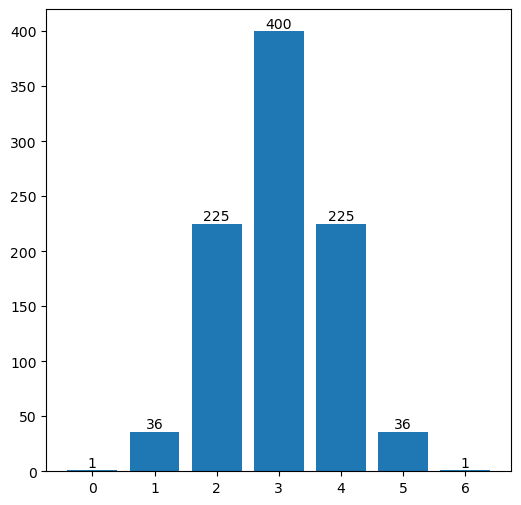

In [19]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 6))

# Bar chart.
bars = ax.bar(counts[0], counts[1])

# Display values on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height, f'{height}', ha='center', va='bottom')
# Show the plot
plt.show()


The results above and also presented in the chart state, the chance of a person getting six correct cups is 1 in 924, The chance of getting five correct cups is 36 in 924, The chance of getting four correct cups is 225 in 924.  The chance of getting half the number of cups right is 400 in 924 which interestingly enough in this case is nearly half the time.  The chance of getting all out of six wrong is 1 in 924. It may the case that the person can tell the difference every time, but not know which group a cup belongs to. 

____

## Part C: Hypothesis and Errors

This part looks at Hypothesis and Evidence.  Acceptance of results is discussed along with acceptable errors.

### The Null Hypothesis ###

* The person has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

* The person is selecting the six cups from the twelve cups at random.

### Alternative Hypothesis ###

* The person can tell the difference

### Evidence ###

If the person is just picking six cups at random, then it is unlikely he / she will pick the correct six. The probability is one in nine hundred and twenty four. It is so unlikely, that I will agree that something non-random is happening when he / she is selecting the cups of tea.

Similar to Fishers beliefs

In [20]:
# The probability that he / she (randomly) selects the six correct cups.
1 / 924

0.0010822510822510823

In [21]:
# The probability that he / she (randomly) selects five correct cups.
36 / 924

0.03896103896103896

In [22]:
# The probability that he / she (randomly) selects four correct cups.
225 / 924

0.2435064935064935

I would be willing to accept a 5 cups out of six correct as it has a 3.8 percent probability of being right.  This would mean that the person had a near 96.2% chance of getting it wrong.  I would not however be willing to accept four cups as the person has a near 25% chance of being right or a 1:4.  

https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

In the original experiment by Ronald A. Fisher, 'Muriel guessed correctly for each of the eight cups, and so correctly identified all four milk-first cups'.  Whether another individual could deliver the same results, is a matter for the subject performing this experiment.  

### Type I Errors, Type II Errors, and Power ###

* Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types
* Power: https://en.wikipedia.org/wiki/Power_(statistics)#Description

__Type I and Type II errors are critical concepts in data analytics.__

Type I Error (False Positive): This is when you reject a true null hypothesis. In this case, it would be mistakenly accepting that someone has the ability to discern the order of milk and tea when they actually don't.

Type II Error (False Negative): This is when you fail to reject a false null hypothesis. Here, it would mean not recognizing a person's ability to discern the order of milk and tea when they genuinely have that ability.

Given my willingness to accept a person correctly identifying 5 out of 6 cups, the 3.8% probability indicates a very stringent acceptance criteria, reducing the likelihood of a Type I error. It reflects a high confidence (96.2% chance of getting it wrong) that if they pass this test, their ability is genuine.

However, If I was to accept the 4 out of 6 cups, it would give a 25% chance of being correct purely by guessing (1 in 4). This is less stringent and increases the likelihood of a Type I error, making it less reliable.

For a better balance between Type I and Type II errors, stringent criteria (like your 5 out of 6 rule) are crucial, especially in critical fields. In scenarios where children's safety is involved, precision is key. Thus, sticking to a 5 out of 6 acceptance rate aligns well with maintaining high standards of accuracy and reducing false positives.

__Power Test__

The power of a test is the probability that it will correctly reject a false null hypothesis, i.e., detecting an effect when there is one. Higher power reduces the risk of Type II errors (false negatives).

In this scenario, I wish to maintain high rigor with the "5 out of 6" criterion. This gives a 3.8% probability of correctly guessing, meaning a 96.2% chance of the person's guess being incorrect. This strict threshold ensures high confidence in their ability if they succeed.

However, the "4 out of 6" criterion with a 25% guessing chance significantly lowers the test's rigor. The higher guessing probability dilutes the power of your test, making it more susceptible to Type I errors (false positives).

Sticking to the stringent "5 out of 6" rule ensures this test maintains high power and reliability, reducing the likelihood of erroneously accepting someone's claimed ability. In high-stakes settings, like ensuring children's safety, this higher power and lower error risk are essential. Balancing rigor and reliability ensures meaningful and trustworthy outcomes in data analytics.

**Note**

This notebook was created with the help of GitHub Copilot.

### End ###

_____

## Task 2

In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

_____

__This task aims to evaluate the effectiveness of numpy.random.normal() in generating normally distributed values. This task will be completed as follows:__

__Generate a Sample:__

Use the numpy.random.normal() function to generate a sample of 100,000 values with a mean of 10.0 and a standard deviation of 3.0.

__Visualize Data:__

Create a histogram of sample values.

__Determine If Discrete Or Continuous Probability Distribution__

Visual Aalysis of graph to determine if it is Discrete or Continuous.  A discrete random variable takes on countable, distinct values (like the number of students in a class), while a continuous random variable can take on any value within a range (like the height of students), and you can tell the difference by whether the variable is countable or measurable.

__Test for Normality:__

Apply the scipy.stats.shapiro() function to test if your sample comes from a normal distribution. The function will return a test statistic and a p-value.  Use qq-plot to test probability of normal distribution.

__Analyze Results:__

Interpret the output from the Shapiro-Wilk test. If the p-value is greater than 0.05, it suggests that the sample likely comes from a normal distribution. Conversely, a p-value less than 0.05 suggests non-normality.

__Finally, we will overlay the histogram with the probability density function of a normal distribution with the same mean and standard deviation.__

In [ ]:
# Importing relevant Libraries for Completion of Task Two

# Numerical structures and operations.  This tool is essential for numerical computing. 
# It supports arrays, matrices, and functions for high-level mathematical operations
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np 

# The shapiro function comes under the statistical tests grouping in the scipy.stats module.
# This tool is essential for testing the normality of a dataset. It's particularly useful in determining whether a sample comes from a normally distributed population.
# The shapiro function performs the Shapiro-Wilk test for normality. It returns a test statistic and a p-value, which you can use to decide whether to reject the null hypothesis that the data is normally distributed.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
from scipy.stats import shapiro

# Plotting.  This is a 2D plotting library that is a great tool for plotting graohs and visualisation of data.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# The norm function falls under the probability distributions grouping in the scipy.stats module.
# This tool is essential for working with the normal (Gaussian) distribution. It's widely used in statistics for modeling and analyzing data that follows a normal distribution.
# The norm function provides a range of methods to work with the normal distribution, including calculating probabilities, generating random samples, and fitting data to a normal distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

from scipy.stats import norm

## Normal Distribution Explained

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

__random.normal(Loc=0.0, Scale=1.0, size-None)__

The numpy.random.normal function generates random samples from a normal (Gaussian) distribution. When using the random.normal function, the mean and standard deviation of the distribution is specified, as well as the number of samples to generate.

The formula for drawing the curve simplifies alot if the mean is zero and the standard deviation is one.  In the Probability Density Function below, The standard deviation (𝜎) cannot be zero because it would make the denominator zero, leading to an undefined function.

In the normal distribution (random.normal function), you get a different a different distribution for every set of values you use for Loc (mean of the distribution,) and scale ( Standard deviation).  The formula simplifies alot if the mean is zero and standard deviation is one as calculated in the mathematical forumula (Probability Density Function).


__Probability Density Function (PDF)__

The Probability Density Function (PDF) of a normal distribution is given by:

$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $

Here's a breakdown of the components:

𝜇 : The mean of the distribution. It determines the center of the distribution.

𝜎 : The standard deviation of the distribution. It measures the spread or dispersion of the distribution.

𝑥 : The variable for which we are calculating the probability density.

𝜋 : A mathematical constant approximately equal to 3.14159.

𝑒 : The base of the natural logarithm, approximately equal to 2.71828.


__Simplified Formula__

When the mean (𝜇) is zero and the standard deviation (𝜎) is one, the formula simplifies to:

\[ f(x) = \frac{1}{\sqrt{2 \pi}} e{-\frac{x2}{2}} \]

This is known as the standard normal distribution.

https://en.wikipedia.org/wiki/Normal_distribution

In [ ]:
## Generate the Random Normal Sample:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal
# The numpy.random.normal function generates random samples from a normal (Gaussian) distribution. You can specify the mean and standard deviation of the distribution, as well as the number of samples to generate.

import numpy as np

# Generate a sample of 100,000 values with a mean of 10.0 and a standard deviation of 3.0
mean = 10.0
std_dev = 3.0
sample_size = 100000
sample = np.random.normal(mean, std_dev, sample_size)

# show
sample

array([ 8.74522257, 12.3127636 ,  8.84823897, ...,  8.96013989,
        6.58699484, 13.92261355])

## Initial Visualisation Of Data

__Discrete Probability Distribution__

A bar chart or histogram is ideal for visualizing discrete probability distributions. Each bar represents the probability of a specific outcome.

__Continuous Probability Distribution__

A line plot or density plot is ideal for visualizing continuous probability distributions. The line represents the probability density function (PDF) of the distribution.

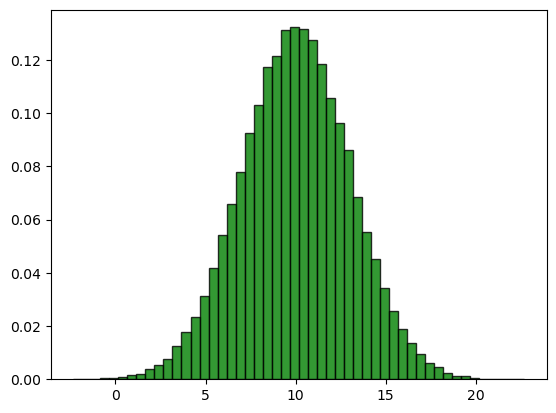

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot histogram of the sample
plt.hist(sample, bins=50, edgecolor='black', density=True, alpha=0.8, color='g')

plt.show()

https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

### Determine If Discrete or Continuous Probability Distribution

Visual analysis of the graph to determine if it is discrete or continuous. A discrete random variable takes on countable, distinct values (like the number of students in a class), while a continuous random variable can take on any value within a range (like the height of students).

The results from the numpy.random.normal() function are considered a continuous probability distribution. This is because the normal distribution, also known as the Gaussian distribution, is a continuous distribution. It can take on any value within a range, and the probability density function (PDF) describes the likelihood of different outcomes within that range. So, the values generated by numpy.random.normal() are continuous, not discrete.

## Test for Normality

### Shapiro-Wilk Test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

According to docs.scipy.org 'Once we determine the sample is normally distributed, we can use the Shapiro-Wilk test to confirm it. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. This test will perform a calculation on the values passed to it. If the calculation turns out to be very unlikely for normally distributed data, this test will have a very small 'p' value'.

It's important to note that if the test fails, the inference we are likely to draw from this is that the data is normally distributed. However, this is not what the test is testing for. The test is actually testing for whether there is evidence to suggest that the data is not normally distributed.

In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for normality
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for normality
stat, p_value = shapiro(sample[:10000])  # Shapiro test is sensitive to sample sizes > 5000.  For N > 5000 the W test statistic is accurate, but the p-value may not be
print(f"Shapiro-Wilk Test: Stat={stat}, p-value={p_value}")



Shapiro-Wilk Test: Stat=0.9997695020107731, p-value=0.35617671455482214


### QQPLOT

A Q-Q (Quantile-Quantile) plot tests whether a dataset follows a specified distribution, typically a normal distribution.


https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

((array([-4.34602155, -4.14724578, -4.03913009, ...,  4.03913009,
          4.14724578,  4.34602155]),
  array([-2.34417458, -1.92310283, -1.60709009, ..., 21.47171179,
         22.25585012, 22.68473044])),
 (3.0034788361634424, 9.993496226603993, 0.9999929433632819))

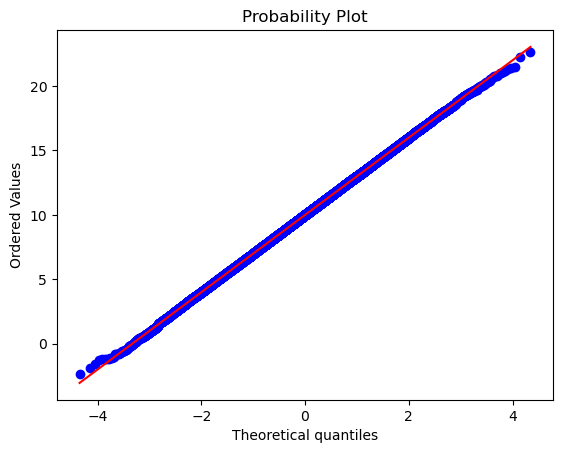

In [16]:
from scipy import stats

# Create an empty plot.
fig, ax = plt.subplots()

# Create a q-q plot.
stats.probplot(sample, dist='norm', plot=ax)

## Analyze Results:

The Shapiro-Wilk test checks if a sample comes from a normally distributed population. The null hypothesis (H0) for this test is that the data is normally distributed.

p-value: The p-value here is 0.356, which is much higher than the common significance level of 0.05. This means we fail to reject the null hypothesis. In simpler terms, there's no strong evidence against the data being normally distributed.

Statistic: The test statistic is very close to 1, which further indicates that the sample distribution is very close to a normal distribution.

QQ-Plot.  A Q-Q (Quantile-Quantile) plot tests whether a dataset follows a specified distribution, typically a normal distribution. It does this by plotting the quantiles of the dataset against the quantiles of the theoretical distribution. If the points lie approximately along a straight line, the data is likely to follow the specified distribution.

### Conclusion ###

Based on the results of the QQ-Plot test and the p-value and the test statistic in the Shapiro-Wilk test, we can conclude that the sample is likely normally distributed.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram

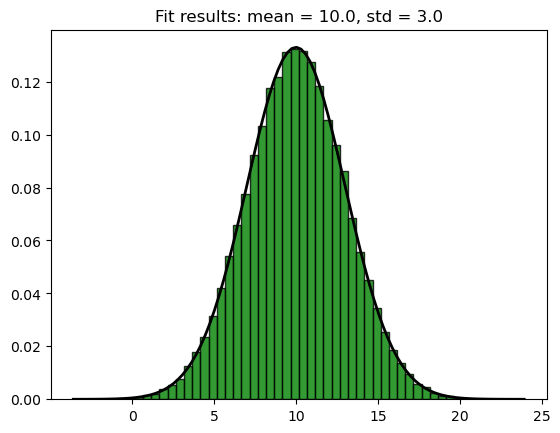

In [19]:
## Visualize Data With Normal Distribution

import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot histogram of the sample
plt.hist(sample, bins=50, edgecolor='black', density=True, alpha=0.8, color='g')

# Plot the corresponding normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mean = {mean}, std = {std_dev}"
plt.title(title)

plt.show()

**Note**

This notebook was created with the help of GitHub Copilot.

This task verified and visualised normal distributions using Python

### End ###

_____